The Cox proportional-hazards model (Cox, 1972) is essentially a regression model commonly used statistical
in medical research for investigating the association between the survival time of patients and one or
more predictor variables.

In the previous chapter (survival analysis basics), we described the basic concepts of survival analyses
and methods for analyzing and summarizing survival data, including:

the definition of hazard and survival functions,
the construction of Kaplan-Meier survival curves for different patient groups
the logrank test for comparing two or more survival curves
The above mentioned methods - Kaplan-Meier curves and logrank tests - are examples of univariate analysis.
They describe the survival according to one factor under investigation, but ignore the impact of any
others.

Additionally, Kaplan-Meier curves and logrank tests are useful only when the predictor variable is
categorical (e.g.: treatment A vs treatment B; males vs females). They don’t work easily for quantitative
predictors such as gene expression, weight, or age.

Basics of the Cox proportional hazards model

The purpose of the model is to evaluate simultaneously the effect of several factors on survival. In other words, it allows us to examine how specified factors influence the rate of a particular event happening (e.g., infection, death) at a particular point in time. This rate is commonly referred as the hazard rate. Predictor variables (or factors) are usually termed covariates in the survival-analysis literature.

The Cox model is expressed by the hazard function denoted by h(t). Briefly, the hazard function can be interpreted as the risk of dying at time t. It can be estimated as follow:

h(t)=h0(t)×exp(b1x1+b2x2+...+bpxp)

where,

t represents the survival time
h(t)is the hazard function determined by a set of p covariates (x1,x2,...,xp)
the coefficients (b1,b2,...,bp) measure the impact (i.e., the effect size) of covariates.
the term h0 is called the baseline hazard. It corresponds to the value of the hazard if all the xi are equal to zero (the quantity exp(0) equals 1).
The ‘t’ in h(t) reminds us that the hazard may vary over time.

The Cox model can be written as a multiple linear regression of the logarithm of the hazard on the variables xi, with the baseline hazard being an ‘intercept’ term that varies with time.

The quantities exp(bi) are called hazard ratios (HR). A value of bi greater than zero, or equivalently a hazard ratio greater than one, indicates that as the value of the ith covariate increases, the event hazard increases and thus the length of survival decreases.

Put another way, a hazard ratio above 1 indicates a covariate that is positively associated with the event probability, and thus negatively associated with the length of survival.

In summary,

HR = 1: No effect
HR < 1: Reduction in the hazard
HR > 1: Increase in Hazard

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [20]:
import pandas as pd

df = pd.read_csv('lung_cancer_examples.csv')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     59 non-null     object
 1   Surname  59 non-null     object
 2   Age      59 non-null     int64 
 3   Smokes   59 non-null     int64 
 4   AreaQ    59 non-null     int64 
 5   Alkhol   59 non-null     int64 
 6   Result   59 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 3.4+ KB


In [14]:
df = df.drop(['Name', 'Surname'], axis=1)
df.corr()

,Age,Smokes,AreaQ,Alkhol,Result
Age,1.000000,0.053665,-0.268957,0.318621,0.637726
Smokes,0.053665,1.000000,-0.353295,0.469915,0.373444
AreaQ,-0.268957,-0.353295,1.000000,-0.714412,-0.746621
Alkhol,0.318621,0.469915,-0.714412,1.000000,0.810439
Result,0.637726,0.373444,-0.746621,0.810439,1.000000


<Axes: >

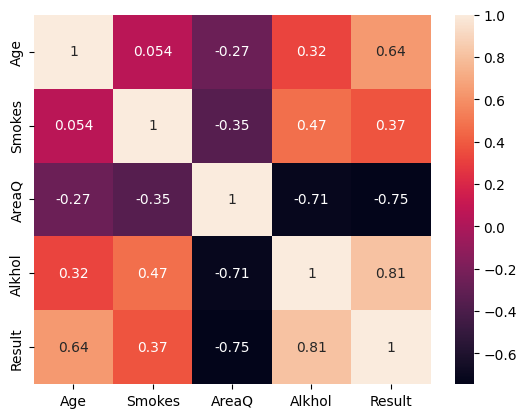

In [16]:
import seaborn as sns

sns.heatmap(df.corr(),annot=True)

In [21]:
df.fillna(df.mean(), inplace=True)
df = pd.get_dummies(df, drop_first=True)

TypeError: Could not convert ['JohnJohnCamelaAlexDiegoCristianoMihailKathyNicoleRayFredricYulJoanJaneAnnaKatharine Katharine BarbraMaggie Glenda Jane Maximilian Gregory Sidney Rex Lee Paul Rod John Gene Marlon Jack Jack Peter Richard Dustin Henry Robert Ellen Faye Diane Jane Sally Sissy Jessica Gwyneth Halle Nicole Charlize Katharine Katharine Barbra Maggie Glenda Ernest Alec Charlton Gregory Sidney '
 'WickConstantineAndersonTellesMaradonaRonaldoTalBatesKidmanMillandMarchBrynnerCrawfordWymanMagnaniHepburnHepburnStreisandSmithJacksonFondaSchellPeckPoitierHarrisonMarvinScofieldSteigerWayneHackmanBrandoLemmonNicholsonFinch DreyfussHoffmanHenry DuvallBurstynDunawayKeatonFondaFieldSpacekLangePaltrowBerryKidmanTheronHepburnHepburnStreisandSmithJacksonBorgnineGuinnessHestonPeckPoitier'] to numeric

In [22]:
X = df.drop(['Result'], axis=1)
y = df[['Result']]

In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

ValueError: could not convert string to float: 'John'

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [ ]:
train_data = TensorDataset(x_train_tensor, y_train_tensor)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

test_data = TensorDataset(x_test_tensor, y_test_tensor)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

In [ ]:
class CancerModel(nn.Module):
    def __init__(self):
        super(CancerModel, self).__init__()
        self.layer1 = nn.Linear(x_train.shape[1], 512)
        self.dropout1 = nn.Dropout(0.5)
        self.layer2 = nn.Linear(512, 256)
        self.dropout2 = nn.Dropout(0.5)
        self.layer3 = nn.Linear(256, 128)
        self.dropout3 = nn.Dropout(0.5)
        self.layer4 = nn.Linear(128, 64)
        self.dropout4 = nn.Dropout(0.5)
        self.layer5 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = self.dropout1(x)
        x = torch.relu(self.layer2(x))
        x = self.dropout2(x)
        x = torch.relu(self.layer3(x))
        x = self.dropout3(x)
        x = torch.relu(self.layer4(x))
        x = self.dropout4(x)
        x = self.layer5(x)
        return self.sigmoid(x)

In [ ]:
model = CancerModel()

In [ ]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

In [ ]:
best_val_loss = float('inf')
patience = 5
epochs_no_improve = 0

In [ ]:
# def algo_test(x, y):
#     models = [
#         LinearRegression(), Ridge(), Lasso(), ElasticNet(), SGDRegressor(),
#         ExtraTreeRegressor(), GradientBoostingRegressor(), AdaBoostRegressor(),
#         KNeighborsRegressor(), RadiusNeighborsRegressor(radius=1.0),
#         DecisionTreeRegressor(), XGBRegressor(), SVR(), MLPRegressor()
#     ]
#     
#     model_names = [
#         'Linear', 'Ridge', 'Lasso', 'ElasticNet', 'SGD', 'Extra Tree', 'Gradient Boosting',
#         'KNeighborsRegressor', 'AdaBoost', 'Decision Tree', 'XGBRegressor', 'SVR', 'MLP Regressor'
#     ]
#     
#     x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
# 
#     scaler = StandardScaler()
#     x_train_scaled = scaler.fit_transform(x_train)
#     x_test_scaled = scaler.transform(x_test)
#     
#     result = pd.DataFrame(columns=['R_Squared', 'RMSE', 'MAE'], index=model_names)
#     
#     for model, name in zip(models, model_names):
#         model.fit(x_train_scaled, y_train)  # Train model
#         predictions = model.predict(x_test_scaled)  # Predict on test set
#         
#         # Evaluate performance
#         r_squared = r2_score(y_test, predictions)
#         rmse = mean_squared_error(y_test, predictions, squared=False)
#         mae = mean_absolute_error(y_test, predictions)
#         
#         result.loc[name] = [r_squared, rmse, mae]
#     
#     result_sorted = result.sort_values(by='R_Squared', ascending=False)
#     
#     plt.figure(figsize=(10, 6))
#     result_sorted['R_Squared'].plot(kind='bar', color='skyblue', edgecolor='black')
#     plt.title('Model Comparison (R-Squared)')
#     plt.ylabel('R-Squared')
#     plt.xticks(rotation=45)
#     plt.show()
# 
#     return result_sorted

In [ ]:
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs).squeeze(1)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs).squeeze(1)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

    running_loss /= len(train_loader)
    val_loss /= len(test_loader)

    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {running_loss:.4f} | Val Loss: {val_loss:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

    scheduler.step()

In [ ]:
model.eval()
with torch.no_grad():
    y_pred = model(x_test_tensor).squeeze(1)
    y_pred = y_pred.round()
    accuracy = (y_pred == y_test_tensor).float().mean()
    print(f"Test Accuracy: {accuracy:.4f}")